<a href="https://colab.research.google.com/github/risavh/KickstarterAnalysis/blob/main/EDA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import json
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv('CK_4_1.csv')
df.shape

<ipython-input-2-51608dd4124c>:1: DtypeWarning: Columns (14,18,20,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('CK_4_1.csv')


(84322, 38)

In [ ]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
0,7,Teen sensation Emma Bilyou is one of the most ...,"{""id"":42,""name"":""Pop"",""analytics_name"":""Pop"",""...",1500,US,the United States,1370358703,"{""id"":1720335385,""name"":""Dwaine Harris"",""is_re...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1375629060,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,1500.00,international
1,12,Thomas Nöla has recorded a new album. He would...,"{""id"":42,""name"":""Pop"",""analytics_name"":""Pop"",""...",581,US,the United States,1363533018,"{""id"":474097748,""name"":""Thomas Nöla"",""slug"":""t...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1373056493,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,581.66,international
2,134,The world's first ever full-length album of br...,"{""id"":42,""name"":""Pop"",""analytics_name"":""Pop"",""...",15631,US,the United States,1369246990,"{""id"":1877703222,""name"":""Kathleen Smith"",""is_r...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1373036535,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,15631.00,international
3,76,"Love, laugh, dance, and cry, to ten new synthp...","{""id"":42,""name"":""Pop"",""analytics_name"":""Pop"",""...",4177,US,the United States,1364398436,"{""id"":1680516234,""name"":""Kite Flying Robot"",""s...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1372680035,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,4177.00,international
4,399,An all new recording from Christian music vete...,"{""id"":42,""name"":""Pop"",""analytics_name"":""Pop"",""...",41100,US,the United States,1366950463,"{""id"":363468529,""name"":""CRYSTAL LEWIS"",""slug"":...",USD,$,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1372658437,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1.0,41100.25,international


In [ ]:
df.loc[1].T

backers_count                                                              12
blurb                       Thomas Nöla has recorded a new album. He would...
category                    {"id":42,"name":"Pop","analytics_name":"Pop","...
converted_pledged_amount                                                  581
country                                                                    US
country_displayable_name                                    the United States
created_at                                                         1363533018
creator                     {"id":474097748,"name":"Thomas Nöla","slug":"t...
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                        

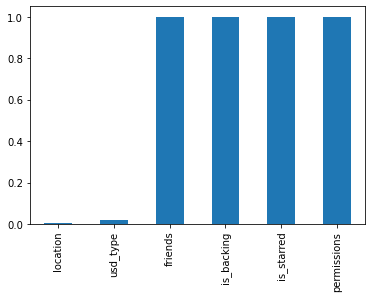

In [ ]:
missing_cols=df.isnull().sum()/df.shape[0]
missing_cols=missing_cols[missing_cols>0]
missing_cols.sort_values().plot(kind='bar')

In [ ]:
df1=df.loc[df['location'].notnull(),:].reset_index(drop=True)
df1.shape

(3633, 39)

In [ ]:
d_ctgy=pd.DataFrame(df1.category.apply(json.loads).values.tolist() )
d_location=pd.DataFrame(df1.location.apply(json.loads).values.tolist() )

In [ ]:
d_ctgy.columns=["ctgy_"+col for col in d_ctgy.columns]
d_location.columns=["lc_"+col for col in d_location.columns]

In [ ]:
cols_to_drop=['photo','category','location','friends','is_backing','permissions','is_starred','creator','source_url']

In [ ]:
df1.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
d_ctgy.shape

(3633, 9)

In [ ]:
d_location.shape

(3633, 12)

In [ ]:
d1=pd.concat([df1,d_location,d_ctgy],axis=1)
d1.shape

(3633, 51)

In [ ]:
missing_cols=d1.isnull().sum()/df.shape[0]
missing_cols=missing_cols[missing_cols>0]
missing_cols.sort_values()

lc_state            0.000274
lc_slug             0.001916
usd_type            0.019704
ctgy_parent_id      0.100164
ctgy_parent_name    0.100164
dtype: float64

In [ ]:
d1.loc[1].T

backers_count                                                              12
blurb                       Thomas Nöla has recorded a new album. He would...
converted_pledged_amount                                                  581
country                                                                    US
country_displayable_name                                    the United States
created_at                                                         1363533018
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                           1373056493
disable_communication                                                   False
fx_rate                                                         

In [ ]:
cols_to_drop=['profile','urls','lc_urls','ctgy_urls','country_displayable_name','currency_symbol','currency_trailing_code','id','static_usd_rate','lc_id',\
              'lc_slug','lc_short_name','lc_displayable_name','lc_country',\
              'lc_is_root','ctgy_id','ctgy_analytics_name','ctgy_position','ctgy_parent_id','ctgy_color']
d1.drop(cols_to_drop,axis=1,inplace=True)

In [ ]:
d1.loc[1].T

backers_count                                                              12
blurb                       Thomas Nöla has recorded a new album. He would...
converted_pledged_amount                                                  581
country                                                                    US
created_at                                                         1363533018
currency                                                                  USD
current_currency                                                          USD
deadline                                                           1373056493
disable_communication                                                   False
fx_rate                                                                   1.0
goal                                                                    500.0
is_starrable                                                            False
launched_at                                                     

In [ ]:
d1['deadline']=d1.deadline.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
d1['launched_at']=d1.launched_at.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
d1['created_at']=d1.created_at.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
d1['state_changed_at']=d1.state_changed_at.apply(lambda x :datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))



In [ ]:
d1.loc[1].T

backers_count                                                              12
blurb                       Thomas Nöla has recorded a new album. He would...
converted_pledged_amount                                                  581
country                                                                    US
created_at                                                2013-03-17 15:10:18
currency                                                                  USD
current_currency                                                          USD
deadline                                                  2013-07-05 20:34:53
disable_communication                                                   False
fx_rate                                                                   1.0
goal                                                                    500.0
is_starrable                                                            False
launched_at                                               2013-0

In [ ]:
d1.shape

(3633, 31)

In [ ]:
d1.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,fx_rate,...,usd_pledged,usd_type,lc_name,lc_localized_name,lc_state,lc_type,lc_expanded_country,ctgy_name,ctgy_slug,ctgy_parent_name
0,7,Teen sensation Emma Bilyou is one of the most ...,1500,US,2013-06-04 15:11:43,USD,USD,2013-08-04 15:11:00,False,1.0,...,1500.00,international,Paramus,Paramus,NJ,Town,United States,Pop,music/pop,Music
1,12,Thomas Nöla has recorded a new album. He would...,581,US,2013-03-17 15:10:18,USD,USD,2013-07-05 20:34:53,False,1.0,...,581.66,international,Boston,Boston,MA,Town,United States,Pop,music/pop,Music
2,134,The world's first ever full-length album of br...,15631,US,2013-05-22 18:23:10,USD,USD,2013-07-05 15:02:13,False,1.0,...,15631.00,international,Los Angeles,Los Angeles,CA,Town,United States,Pop,music/pop,Music
3,76,"Love, laugh, dance, and cry, to ten new synthp...",4177,US,2013-03-27 15:33:56,USD,USD,2013-07-01 12:00:00,False,1.0,...,4177.00,international,Oklahoma City,Oklahoma City,OK,Town,United States,Pop,music/pop,Music
4,399,An all new recording from Christian music vete...,41100,US,2013-04-26 04:27:43,USD,USD,2013-07-01 06:00:37,False,1.0,...,41100.25,international,Kalispell,Kalispell,MT,Town,United States,Pop,music/pop,Music


In [ ]:
pd.to_datetime(d1['deadline'])

0      2013-08-04 15:11:00
1      2013-07-05 20:34:53
2      2013-07-05 15:02:13
3      2013-07-01 12:00:00
4      2013-07-01 06:00:37
               ...        
3628   2019-09-17 21:59:23
3629   2011-01-01 04:30:00
3630   2010-12-25 01:00:00
3631   2011-01-01 02:00:00
3632   2010-12-31 05:00:00
Name: deadline, Length: 3633, dtype: datetime64[ns]

In [ ]:
d1.state.value_counts()

successful    3006
failed         518
canceled       109
Name: state, dtype: int64

In [ ]:
d1[["deadline", "launched_at", "created_at","state_changed_at"]] = d1[["deadline", "launched_at", "created_at","state_changed_at"]].apply(pd.to_datetime)


In [ ]:
d1['daysToDeadline']=(d1['deadline'] - d1['launched_at']).dt.days

In [ ]:
d1.ctgy_name.value_counts()

Pop                   700
Fiction               672
Graphic Novels        660
Web                   180
Journalism            176
Product Design        173
Food                  167
Drinks                143
Plays                 110
Print                 107
Small Batch            86
Audio                  81
Restaurants            78
Video                  46
Vegan                  46
Farms                  40
Cookbooks              39
Food Trucks            24
Design                 23
Spaces                 18
Toys                   15
Photo                  13
Graphic Design         10
Farmer's Markets        7
Events                  6
Community Gardens       5
Architecture            4
Typography              2
Interactive Design      1
Bacon                   1
Name: ctgy_name, dtype: int64

In [ ]:
d1.ctgy_name.value_counts().shape[0]

30

In [ ]:
d1.head()

,backers_count,blurb,converted_pledged_amount,country,created_at,currency,current_currency,deadline,disable_communication,fx_rate,...,usd_type,lc_name,lc_localized_name,lc_state,lc_type,lc_expanded_country,ctgy_name,ctgy_slug,ctgy_parent_name,daysToDeadline
0,7,Teen sensation Emma Bilyou is one of the most ...,1500,US,2013-06-04 15:11:43,USD,USD,2013-08-04 15:11:00,False,1.0,...,international,Paramus,Paramus,NJ,Town,United States,Pop,music/pop,Music,59
1,12,Thomas Nöla has recorded a new album. He would...,581,US,2013-03-17 15:10:18,USD,USD,2013-07-05 20:34:53,False,1.0,...,international,Boston,Boston,MA,Town,United States,Pop,music/pop,Music,30
2,134,The world's first ever full-length album of br...,15631,US,2013-05-22 18:23:10,USD,USD,2013-07-05 15:02:13,False,1.0,...,international,Los Angeles,Los Angeles,CA,Town,United States,Pop,music/pop,Music,30
3,76,"Love, laugh, dance, and cry, to ten new synthp...",4177,US,2013-03-27 15:33:56,USD,USD,2013-07-01 12:00:00,False,1.0,...,international,Oklahoma City,Oklahoma City,OK,Town,United States,Pop,music/pop,Music,26
4,399,An all new recording from Christian music vete...,41100,US,2013-04-26 04:27:43,USD,USD,2013-07-01 06:00:37,False,1.0,...,international,Kalispell,Kalispell,MT,Town,United States,Pop,music/pop,Music,30


In [ ]:
cols_to_use=['spotlight','ctgy_name','backers_count','pledged','goal','state', 'state_changed_at', 'created_at','launched_at', 'deadline','country', 'is_starrable','staff_pick','lc_state', 'lc_type',
       'lc_expanded_country','usd_exchange_rate', 'usd_pledged',
       'usd_type',]

In [ ]:
cols_to_use=['spotlight','ctgy_name','backers_count','pledged','goal','state', 'state_changed_at', 'created_at','launched_at', 'deadline','country', 'is_starrable','staff_pick']

In [ ]:
d1[cols_to_use].head()

,spotlight,ctgy_name,backers_count,pledged,goal,state,state_changed_at,created_at,launched_at,deadline,country,is_starrable,staff_pick
0,True,Pop,7,1500.00,1500.0,successful,2013-08-04 15:11:00,2013-06-04 15:11:43,2013-06-05 22:53:06,2013-08-04 15:11:00,US,False,False
1,True,Pop,12,581.66,500.0,successful,2013-07-05 20:34:53,2013-03-17 15:10:18,2013-06-05 20:34:53,2013-07-05 20:34:53,US,False,False
2,True,Pop,134,15631.00,15000.0,successful,2013-07-05 15:02:15,2013-05-22 18:23:10,2013-06-05 15:02:13,2013-07-05 15:02:13,US,False,False
3,True,Pop,76,4177.00,3500.0,successful,2013-07-01 12:00:35,2013-03-27 15:33:56,2013-06-05 02:33:20,2013-07-01 12:00:00,US,False,False
4,True,Pop,399,41100.25,40000.0,successful,2013-07-01 06:00:37,2013-04-26 04:27:43,2013-06-01 06:00:37,2013-07-01 06:00:37,US,False,False


In [ ]:
d1.columns

Index(['backers_count', 'blurb', 'converted_pledged_amount', 'country',
       'created_at', 'currency', 'current_currency', 'deadline',
       'disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'launched_at', 'name', 'pledged', 'slug', 'spotlight', 'staff_pick',
       'state', 'state_changed_at', 'usd_exchange_rate', 'usd_pledged',
       'usd_type', 'lc_name', 'lc_localized_name', 'lc_state', 'lc_type',
       'lc_expanded_country', 'ctgy_name', 'ctgy_slug', 'ctgy_parent_name',
       'daysToDeadline'],
      dtype='object')

In [ ]:
d1[['converted_pledged_amount','usd_pledged','goal','ctgy_name','state']]

,converted_pledged_amount,usd_pledged,goal,ctgy_name,state
0,1500,1500.000000,1500.0,Pop,successful
1,581,581.660000,500.0,Pop,successful
2,15631,15631.000000,15000.0,Pop,successful
3,4177,4177.000000,3500.0,Pop,successful
4,41100,41100.250000,40000.0,Pop,successful
...,...,...,...,...,...
3628,10591,10511.913093,15000.0,Drinks,successful
3629,6631,6631.000000,5000.0,Pop,successful
3630,4050,4050.220000,4000.0,Pop,successful
3631,1210,1210.000000,600.0,Pop,successful


In [ ]:
d1.loc[d1.state=='failed',['converted_pledged_amount','usd_pledged','goal','ctgy_name','state']].head()

,converted_pledged_amount,usd_pledged,goal,ctgy_name,state
48,1848,1843.046992,5000.0,Plays,failed
734,22235,22235.010000,35000.0,Journalism,failed
797,50,51.066804,5000.0,Audio,failed
798,1317,1325.440084,3500.0,Journalism,failed
799,81,81.791145,1000.0,Journalism,failed


In [ ]:
def fxn_hist_box_plot(df,col):
    fig,ax=plt.subplots(1,2,figsize=(12,5))
    #sns.violinplot(df[col],ax=ax[0],color='teal',cut=2)
    sns.boxplot(df[col],ax=ax[0],color='teal')
    ax[0].set_title('Violin plot')
    
    ax[0].set_xlabel(col)


    sns.distplot(df[col],ax=ax[1],color='tomato')
    ax[1].axvline(df[col].mean(),  label='Mean',color='teal')
    ax[1].axvline(df[col].median(),  label='Median',linestyle='dotted',color='black')
    ax[1].set_xlabel(col)

    ax[1].set_title('Histogram')
    tit1='Distribution of '+col
    plt.suptitle(tit1)
    plt.tight_layout()
    plt.legend()
    plt.show()

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


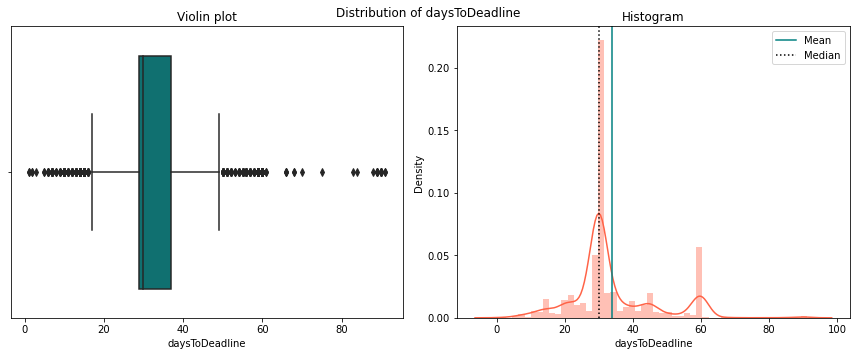

In [ ]:
fxn_hist_box_plot(d1,'daysToDeadline')